Mean Squared Error on unscaled data: 81.82
Coefficients (unscaled): [1.32476007 0.49677498]

Mean Squared Error on scaled data: 81.82
Coefficients (scaled): [ 13.0313782  490.38293623]


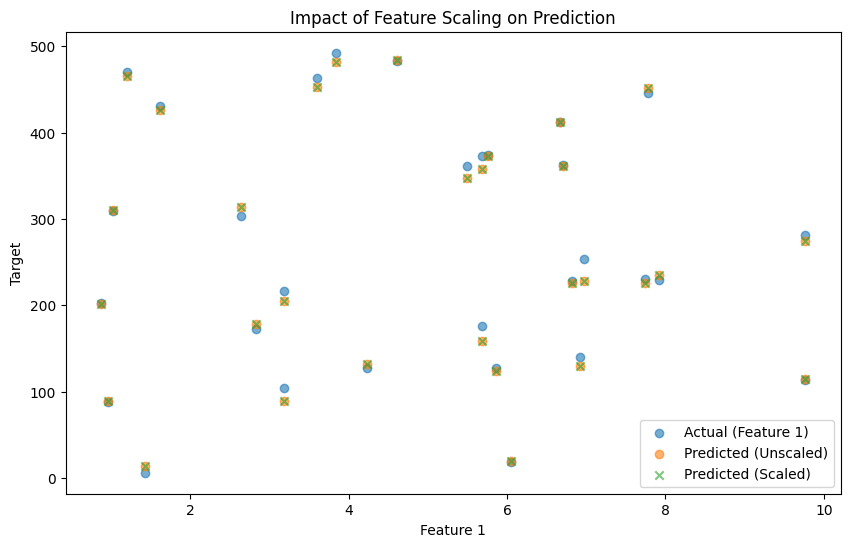

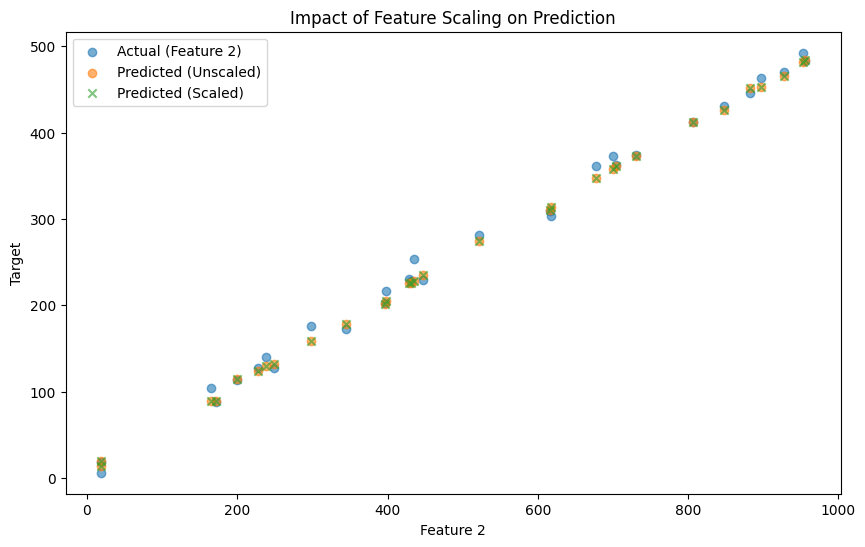

Iris dataset after Min-Max Scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Range of features after scaling:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                0.0               0.0                0.0               0.0
max                1.0               1.0                1.0               1.0
Iris dataset after Standardization (Z-score Scaling):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.90

In [1]:
# Question 1: Feature Scaling
# Task: Explain why feature scaling is essential and demonstrate the impact of unscaled features on a machine learning model.




# Question 2: Min-Max Scaling
# Task: Implement Min-Max Scaling on the Iris dataset.



# Question 3: Standardization (Z-score Scaling)
# Task: Implement Standardization using Z-score scaling on the Iris dataset.




# Question 4: Robust Scaling
# Task: Implement Robust Scaling to handle outliers in the Iris dataset.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset with unscaled features
np.random.seed(0)
n_samples = 100
feature1 = np.random.rand(n_samples) * 10
feature2 = np.random.rand(n_samples) * 1000
target = 2 * feature1 + 0.5 * feature2 + np.random.randn(n_samples) * 10

X = np.column_stack((feature1, feature2))
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model on unscaled data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)

print(f"Mean Squared Error on unscaled data: {mse_unscaled:.2f}")
print(f"Coefficients (unscaled): {model_unscaled.coef_}")

# Now, scale the features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f"\nMean Squared Error on scaled data: {mse_scaled:.2f}")
print(f"Coefficients (scaled): {model_scaled.coef_}")

# Visualize the impact (optional, but illustrative)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Actual (Feature 1)', alpha=0.6)
plt.scatter(X_test[:, 0], y_pred_unscaled, label='Predicted (Unscaled)', alpha=0.6)
plt.scatter(X_test[:, 0], y_pred_scaled, label='Predicted (Scaled)', alpha=0.6, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Impact of Feature Scaling on Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, label='Actual (Feature 2)', alpha=0.6)
plt.scatter(X_test[:, 1], y_pred_unscaled, label='Predicted (Unscaled)', alpha=0.6)
plt.scatter(X_test[:, 1], y_pred_scaled, label='Predicted (Scaled)', alpha=0.6, marker='x')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Impact of Feature Scaling on Prediction')
plt.legend()
plt.show()

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Load the Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform it
df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

print("Iris dataset after Min-Max Scaling:")
print(df_iris.head())
print("\nRange of features after scaling:")
print(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].agg(['min', 'max']))

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature data and transform it
df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

print("Iris dataset after Standardization (Z-score Scaling):")
print(df_iris.head())
print("\nMean and Standard Deviation of features after scaling:")
print(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].agg(['mean', 'std']))

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
import numpy as np

# Load the Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

# Introduce artificial outliers to 'sepal length (cm)'
np.random.seed(42)
outlier_indices = np.random.choice(df_iris.index, size=10, replace=False)
df_iris.loc[outlier_indices, 'sepal length (cm)'] = df_iris.loc[outlier_indices, 'sepal length (cm)'] * 3

print("Iris dataset with artificial outliers:")
print(df_iris.head(15))

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the feature data and transform it
df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

print("\nIris dataset after Robust Scaling:")
print(df_iris.head(15))
print("\nMedian of features after scaling:")
print(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].median())
print("\nInterquartile Range (IQR) of features after scaling (approximately):")
print(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].quantile(0.75) - df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].quantile(0.25))

